# UAS Deep Learning Semester 7
## Deteksi Objek Rambu Lalu Lintas Menggunakan YOLO11
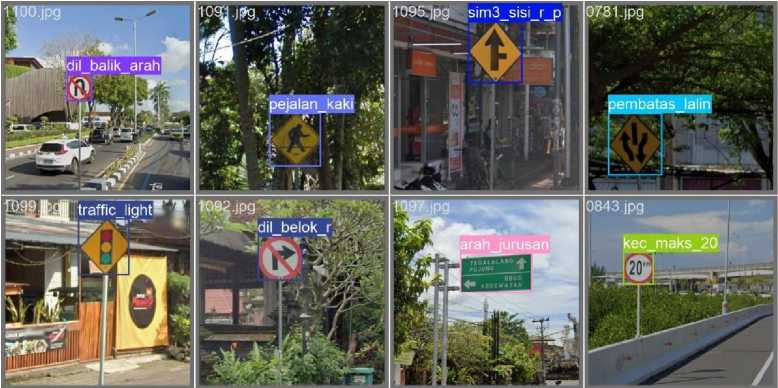

## Deteksi 21 Jenis Rambu Lalu Lintas Menggunakan YOLOv11
Kami mengambil permasalahan pada banyaknya kejadian kelalaian atau kecelakaan di jalan raya yang disebabkan karena belum pahamnya akan rambu lalu lintas atau pun tidak sadarnya akan ada rambu tersebut. Maka dari itu kami membuat project object detection rambu lalu lintas menggunakan YOLO yang terkenal akan kemampuannya dalam mendeteksi multi objek secara real time.

Ringkasan proses pengerjaan projek objek detection rambu lalu lintas dapat diringkas menjadi pada list berikut:
1. Menentukan **permasalahan dan bentuk dataset** yang dibutuhkan.
2. **Mencari dataset** berdasarkan permasalahan yang dipilih.
3. **Membersihkan** dataset citra dan **melabelinya** pada platform **Roboflow** dengan banyaknya itu **21 kelas** yang berisi 100 gambar setiap kelasnya atau **2.100 gambar**.
4. Lakukan praprocessing dan augmentasi pada dataset citra, sehingga mendapatkan total **5.380 gambar** dengan rasio splitting **78:11:11**.
5. Membuat notebook **.ipynb** di **google colab** sebagai tempat pengerjaan projek.
6. Menuangkan segala keperluan jawaban untuk soal pada notebook.
7. Melakukan persiapan seperti instalasi kebutuhan dan download dataset hasil praprocessing.
8. Melakukan **training YOLO11 pada dataset hasil praprocessing**.
9. **Evaluasi model** yang didapatkan dan **menampilkan beberapa grafik** atau hasil training model.
10. Melakukan **tes prediksi** pada model yang telah dilatih.

Our Team Members:
1. Dani Akhmad Maulana (2230511007)
2. Raihan Aulia Rahman (2230511037)
3. Faisal Triaputra (2230511042)
4. Raditya Bagja Saputra (2230511045)
5. Rifqi Fakhrezi Pasya (2530517003)

In [ ]:
# Cek lingkungan komputer
!nvidia-smi

Tue Jan  6 13:39:52 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   39C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

### 1. Business Understanding

Rambu lalu lintas memiliki peranan penting dalam menjaga keselamatan dan ketertiban di jalan raya, namun efektivitasnya sangat bergantung pada kemampuan pengemudi dalam mengenali dan memahami informasi visual yang disampaikan dalam waktu singkat. Berbagai faktor seperti kelelahan, gangguan konsentrasi, serta kondisi lingkungan yang kurang ideal, seperti hujan atau pencahayaan minim, sering kali menurunkan kemampuan visual pengemudi dan berkontribusi terhadap terjadinya kecelakaan lalu lintas. Perkembangan teknologi kecerdasan buatan, khususnya dalam bidang computer vision, memberikan peluang untuk mengatasi keterbatasan tersebut melalui sistem deteksi rambu lalu lintas secara otomatis. Tantangan utama dalam pengembangan sistem ini terletak pada pemilihan algoritma deteksi objek yang mampu bekerja secara real-time dengan tingkat akurasi tinggi, terutama dalam mendeteksi objek berukuran kecil dan kondisi visual lingkungan yang dinamis. Oleh karena itu, penelitian ini menggunakan algoritma YOLOv11 karena kemampuannya dalam menyeimbangkan kecepatan inferensi dan ketepatan deteksi, sehingga sesuai untuk aplikasi keselamatan berkendara.

Untuk mendukung pencapaian tujuan tersebut, penelitian ini memerlukan dataset citra rambu lalu lintas dalam bentuk data visual digital (gambar) yang merepresentasikan kondisi jalan sesungguhnya. Dataset yang dibutuhkan berupa kumpulan gambar rambu lalu lintas dengan berbagai variasi kelas, sudut pengambilan, jarak, dan kondisi pencahayaan, serta dilengkapi dengan anotasi bounding box untuk setiap objek rambu. Dataset ini digunakan sebagai dasar dalam proses pelatihan, validasi, dan pengujian model deteksi objek, sehingga mampu mencerminkan kebutuhan sistem dalam mendeteksi rambu lalu lintas secara otomatis dan real-time.

### 2. Data Understanding

Pada tahap Data Understanding, dilakukan identifikasi dan pemahaman terhadap dataset yang digunakan sebagai dasar pengembangan model deteksi rambu lalu lintas. Dataset ini dikumpulkan dan dianalisis untuk memastikan kesesuaian data dengan kebutuhan pelatihan model YOLOv11. Adapun karakteristik dataset yang digunakan dalam penelitian ini adalah sebagai berikut:

* **Sumber data:** Kaggle
* **Jumlah citra:** 2100 gambar
* **Jumlah kelas:** 21 jenis rambu lalu lintas
* **Jenis data:** Citra digital (gambar)
* **Karakteristik data:** Variasi sudut pengambilan, jarak objek, dan kondisi pencahayaan
* **Pengolahan lanjutan:** Pelabelan bounding box, pembagian data, dan konversi format menggunakan Roboflow

### 3. Data Preparation

Pada tahap Data Preparation, dataset yang telah dipahami pada tahap sebelumnya dipersiapkan agar sesuai untuk proses pelatihan model deteksi objek menggunakan YOLOv11. Tahap ini bertujuan memastikan data berada dalam format yang terstruktur, konsisten, dan siap digunakan dalam proses deep learning. Adapun langkah-langkah yang dilakukan pada tahap ini adalah sebagai berikut:

* **Pelabelan data:** 21 kelas rambu lalu lintas diberi anotasi bounding box sesuai kelas objek menggunakan platform Roboflow
* **Pembagian dataset:** Data dibagi menjadi data latih (training), validasi (validation), dan uji (testing) dengan rasio 78:11:11.
* **Augmentasi data:** Dilakukan augmentasi ringan seperti perubahan pencahayaan dan rotasi untuk meningkatkan variasi data
* **Konversi format:** Dataset diekspor ke format YOLO (Ultralytics/YOLOv8) agar kompatibel dengan YOLOv11
* **Struktur data:** Dataset disusun dalam direktori terpisah untuk memudahkan proses pelatihan dan evaluasi model

### 4. Modelling

Install Requirements

In [ ]:
# Instalasi Requirements
!pip install -U ultralytics # Install Ultralytics (sudah termasuk YOLO11)
!pip install roboflow
!pip install pillow matplotlib # Library pendukung visualisasi & image processing

# Panggil Library
from ultralytics import YOLO
from roboflow import Roboflow
from PIL import Image
import matplotlib.pyplot as plt
import os

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 64.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 92.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 125.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings wit

Ringkasan kebutuhan:
* Ultralytics merupakan pustaka yang memiliki berbagai keperluan dalam memenuhi kebutuhan projek computer vision seperti YOLO.
* Roboflow merupakan platform
* Matplotlib merupakan pustaka untuk menampilkan plot khususnya dalam projek ini sebagai penampil gambar.
* PIL untuk pustaka proses gambar.
* OS untuk pustaka operating system.

Ambil dataset citra **Traffic Sign** yang telah dilabeli pada Roboflow

In [ ]:
# Dataset citra memiliki format YOLOv8
rf = Roboflow(api_key="fbR9K5MJKYvi1MrRD5lj")
project = rf.workspace("dakhmadlearner").project("object-detection-traffic-sign-k2v9o")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Object-Detection-Traffic-Sign-1 in yolov8:: 100%|██████████| 10772/10772 [00:01<00:00, 7968.26it/s] 


In [ ]:
# Cek lokasi dataset
print("Dataset location:", dataset.location)
print("Isi folder:", os.listdir(dataset.location))

Dataset location: /content/Object-Detection-Traffic-Sign-1
Isi folder: ['test', 'train', 'README.roboflow.txt', 'valid', 'data.yaml', 'README.dataset.txt']


Modelling YOLO11 kepada dataset citra **Traffic Sign**

In [ ]:
# Modelling yolo11s.pt, tugas: object detection, imgsize: 640x640, batch: 16,
!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=80 imgsz=640 batch=16 patience=20 save=True plots=True

Ultralytics 8.3.248 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Object-Detection-Traffic-Sign-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=80, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=20, perspective=0.

In [ ]:
# Modelling yolo11s.pt, tugas: object detection, imgsize: 640x640, batch: 16
#!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=50 imgsz=640 batch=16 plots=True

# Hasil akurasi 97%

Diterapkan beberapa teknik training model YOLO11, yaitu:
* **Early Stopping** → kontrol untuk berhenti lebih awal demi mendapat model terbaik
* **Model Checkpoint** → disimpan otomatis sebagai best.pt dan last.pt

Pada kode
!yolo task=detect ... patience=10 save=True plots=True

patience merupakan teknik Early Stopping yang akan terjadi ketika akurasi malah menurun dalam 10 kali epoch kedepannya. Kemudian save=True merupakan bagian yang menyimpan otomatis model terbaik (best.pt) dan model terakhir (last.pt) ketika proses training model YOLO.

### 5. Evaluation

In [ ]:
# Deklarasi variabel model untuk pilih model hasil training
model = YOLO("runs/detect/train/weights/best.pt") # pakai model best.pt hasil training model

Evaluasi Model

In [ ]:
metrics = model.val()

Ultralytics 8.3.248 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,420,927 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1181.3±304.1 MB/s, size: 34.1 KB)
val: Scanning /content/Object-Detection-Traffic-Sign-1/valid/labels.cache... 230 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 230/230 125.0Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 15/15 2.0it/s 7.4s
                   all        230        248      0.936      0.963       0.97      0.766
           lampu-hijau         10         15      0.872      0.905      0.901      0.695
          lampu-kuning         14         14          1      0.897      0.983      0.595
           lampu-merah          9         13      0.626      0.692       0.69      0.438
  larangan-belok-kanan         13         13      0.984          1      0.995      0.914
   larangan-belok-ki

In [ ]:
# Evaluasi model
print("mAP@0.5     :", metrics.box.map50)
print("mAP@0.5:0.95:", metrics.box.map)
print("Precision   :", metrics.box.mp)
print("Recall      :", metrics.box.mr)

mAP@0.5     : 0.9703459595661416
mAP@0.5:0.95: 0.7655172672578813
Precision   : 0.9356109949270209
Recall      : 0.9628297930048081


Berdasarkan hasil evaluasi menggunakan model YOLOv11s, diperoleh:
* Nilai mAP@0.5 sebesar 0.9703 dan mAP@0.5:0.95 sebesar 0.7655, yang menunjukkan bahwa model memiliki tingkat akurasi deteksi yang sangat tinggi baik pada ambang IoU moderat maupun ketat.
* Nilai precision sebesar 0.9356 mengindikasikan bahwa sebagian besar prediksi yang dihasilkan model adalah benar,
* sementara recall sebesar 0.9628 menunjukkan kemampuan model yang sangat baik dalam mendeteksi hampir seluruh rambu lalu lintas yang terdapat pada citra uji.

Penerapan early stopping dengan patience 20 menyebabkan proses pelatihan dihentikan secara otomatis pada epoch ke-50, menandakan bahwa model telah mencapai kondisi konvergen sebelum mencapai batas maksimum 80 epoch. Secara keseluruhan, hasil ini membuktikan bahwa penggunaan early stopping mampu meningkatkan efisiensi pelatihan tanpa menurunkan performa model, serta menghasilkan model terbaik (best.pt) yang andal untuk deteksi rambu lalu lintas secara akurat dan konsisten.

Grafik Hasil Training Model

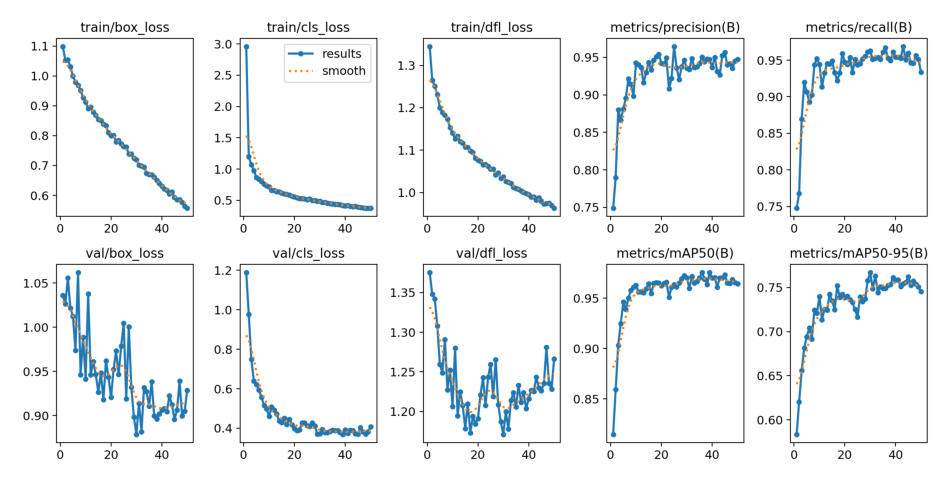

In [ ]:
# Grafik hasil training model
# ambil gambar grafik hasil training
img = Image.open("runs/detect/train/results.png")

plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis("off")
plt.show()

Grafik hasil pelatihan menunjukkan bahwa nilai training loss dan validation loss mengalami penurunan secara bertahap dan cenderung stabil seiring bertambahnya epoch, yang menandakan proses pembelajaran model berjalan dengan baik. Tidak terdapat perbedaan yang signifikan antara loss pada data training dan validasi, sehingga dapat disimpulkan bahwa model tidak mengalami overfitting.

Nilai precision dan recall meningkat secara cepat pada awal pelatihan dan kemudian stabil pada nilai yang tinggi, menunjukkan kemampuan model dalam mendeteksi rambu lalu lintas secara akurat dan konsisten.

Selain itu, grafik mAP@0.5 dan mAP@0.5:0.95 menunjukkan peningkatan yang signifikan hingga mencapai kondisi konvergen sekitar epoch ke-50, yang menjadi dasar diterapkannya early stopping untuk menghentikan pelatihan secara otomatis ketika performa model telah optimal.

Confussion Matrix

(np.float64(-0.5), np.float64(2999.5), np.float64(2249.5), np.float64(-0.5))

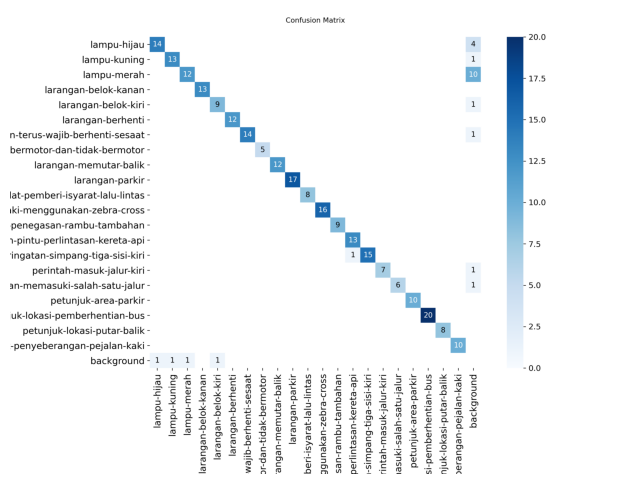

In [ ]:
# Confussion Matrix hasil training
# ambil gambar confussion matrix dari hasil training model
img = Image.open("runs/detect/train/confusion_matrix.png")
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis("off")

Confusion matrix menunjukkan bahwa sebagian besar prediksi model berada pada diagonal utama, yang menandakan tingkat klasifikasi yang sangat baik pada hampir seluruh kelas rambu lalu lintas. Hal ini mengindikasikan bahwa model YOLOv11 mampu membedakan masing-masing kelas dengan akurasi tinggi.

Beberapa kesalahan klasifikasi masih terlihat pada kelas-kelas tertentu, terutama pada rambu yang memiliki bentuk visual atau warna yang serupa, seperti rambu **lampu lalu lintas** dan beberapa rambu peringatan.

Selain itu, terdapat sejumlah kecil objek yang terdeteksi sebagai background, yang menunjukkan bahwa model masih mengalami kesulitan pada kondisi citra tertentu, seperti ukuran objek yang kecil atau pencahayaan yang kurang optimal. Meskipun demikian, jumlah kesalahan tersebut relatif kecil dibandingkan total prediksi yang benar, sehingga secara keseluruhan model dapat dikatakan memiliki performa klasifikasi yang sangat baik dan stabil.

### 6. Deployment

Karena satu dan lain hal, kami tidak melakukan deployment model deteksi rambu lalu lintas menggunakan YOLO11 ini. Tetapi kami melakukan tes prediksi menggunakan gambar diluar dataset.

Memasukkan file gambar citra_testing

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')

Saving citra_testing.zip to citra_testing.zip
User uploaded file "citra_testing.zip" with length 908104 bytes


In [ ]:
!unzip citra_testing.zip

Archive:  citra_testing.zip
   creating: citra_testing/
  inflating: citra_testing/testing_image (1).jpg  
  inflating: citra_testing/testing_image (2).jpg  
  inflating: citra_testing/testing_image (3).jpg  
  inflating: citra_testing/testing_image (4).jpg  
  inflating: citra_testing/testing_image (5).jpg  
  inflating: citra_testing/testing_image (6).jpg  


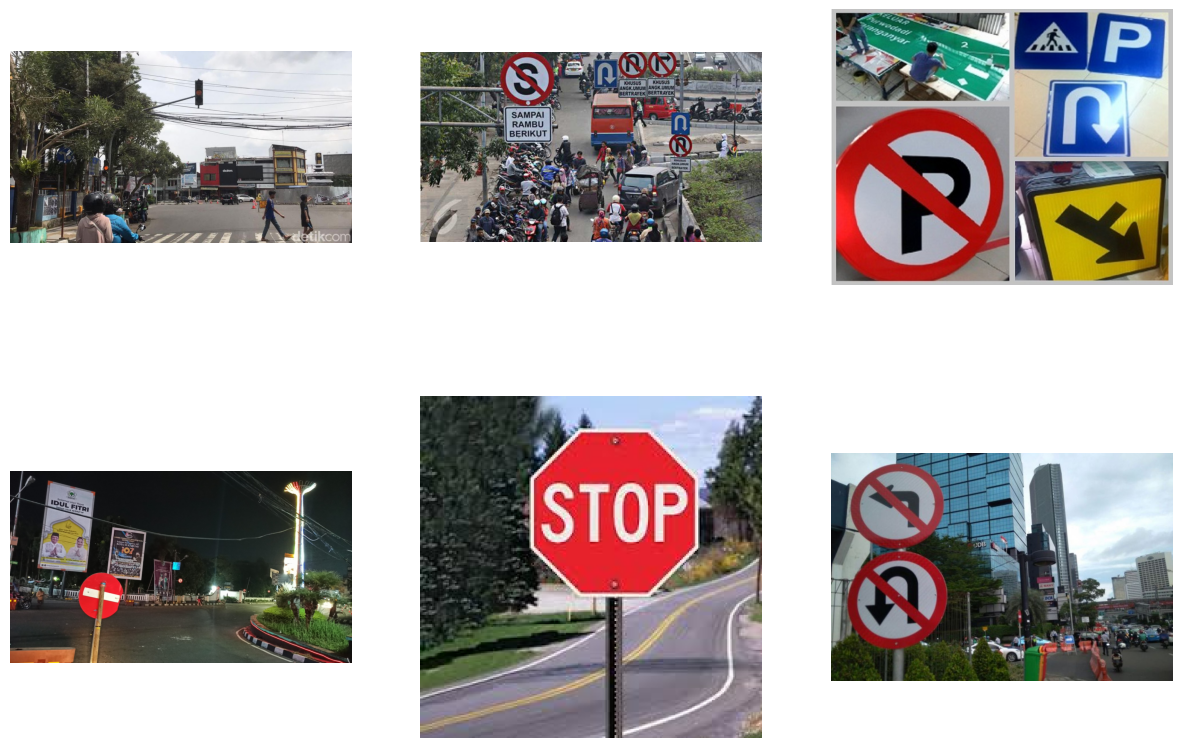

In [ ]:
# Menampilkan beberapa gambar test (6 gambar)
from glob import glob

images = glob("/content/citra_testing/*.jpg")[:6]  # ambil 6 gambar pertama

plt.figure(figsize=(15, 10))
for i, img_path in enumerate(images):
    plt.subplot(2, 3, i+1)
    img = Image.open(img_path)
    plt.imshow(img)
    plt.axis("off")
plt.show()

Test Prediksi Rambu Lalu Lintas dari Gambar

In [ ]:
# Prediksi gambar lalu lintas
model.predict(
    source="/content/citra_testing",
    imgsz=640,
    conf=0.25,
    save=True
)


image 1/6 /content/citra_testing/testing_image (1).jpg: 448x640 1 larangan-belok-kiri, 1 larangan-memutar-balik, 13.5ms
image 2/6 /content/citra_testing/testing_image (2).jpg: 544x640 1 larangan-parkir, 1 petunjuk-area-parkir, 1 petunjuk-lokasi-putar-balik, 15.6ms
image 3/6 /content/citra_testing/testing_image (3).jpg: 384x640 1 larangan-masuk-bagi-kendaraan-bermotor-dan-tidak-bermotor, 11.6ms
image 4/6 /content/citra_testing/testing_image (4).jpg: 384x640 1 lampu-merah, 10.9ms
image 5/6 /content/citra_testing/testing_image (5).jpg: 640x640 1 larangan-berjalan-terus-wajib-berhenti-sesaat, 16.5ms
image 6/6 /content/citra_testing/testing_image (6).jpg: 384x640 1 larangan-berhenti, 11.6ms
Speed: 2.2ms preprocess, 13.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/runs/detect/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'lampu-hijau', 1: 'lampu-kuning', 2: 'lampu-merah', 3: 'larangan-belok-kanan', 4: 'larangan-belok-kiri', 5: 'larangan-berhenti', 6: 'larangan-berjalan-terus-wajib-berhenti-sesaat', 7: 'larangan-masuk-bagi-kendaraan-bermotor-dan-tidak-bermotor', 8: 'larangan-memutar-balik', 9: 'larangan-parkir', 10: 'peringatan-alat-pemberi-isyarat-lalu-lintas', 11: 'peringatan-banyak-pejalan-kaki-menggunakan-zebra-cross', 12: 'peringatan-penegasan-rambu-tambahan', 13: 'peringatan-pintu-perlintasan-kereta-api', 14: 'peringatan-simpang-tiga-sisi-kiri', 15: 'perintah-masuk-jalur-kiri', 16: 'perintah-pilihan-memasuki-salah-satu-jalur', 17: 'petunjuk-area-parkir', 18: 'petunjuk-lokasi-pemberhentian-bus', 19: 'petunjuk-lokasi-putar-balik', 20: 'petunjuk-penyeberangan-pejalan-kaki'}
 obb: None
 orig_img: array([[[206, 194, 166],
         [207, 195, 167],
     

Ambil beberapa hasil deteksi rambu lalu lintas

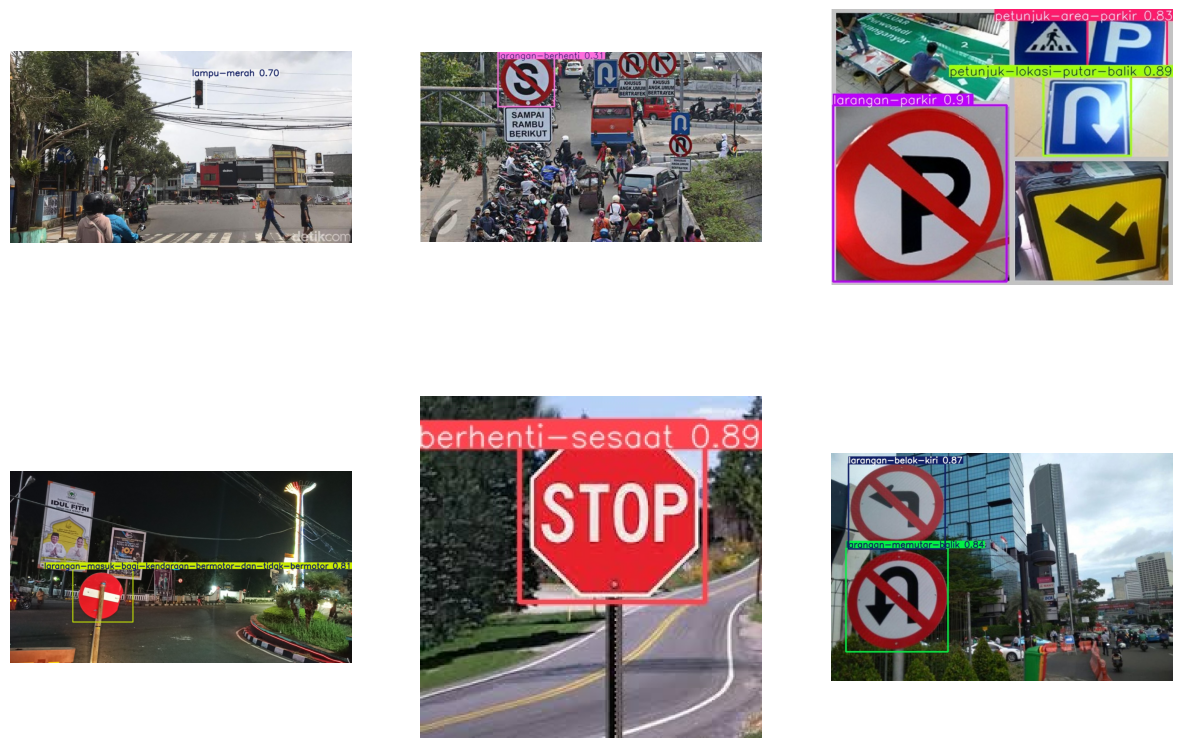

In [ ]:
# Ambil beberapa hasil deteksi rambu lalu lintas
images = glob("runs/detect/predict/*.jpg")[:6]  # ambil 6 gambar pertama

plt.figure(figsize=(15, 10))
for i, img_path in enumerate(images):
    plt.subplot(2, 3, i+1)
    img = Image.open(img_path)
    plt.imshow(img)
    plt.axis("off")
plt.show()